# CA1 Assignment

## Instructions
For your CA1 assignment, you are to fill in the missing code cell blocks and produce an output that is indicated below the cell block. Follow the task instructions as directed in each section and write your code under the TODO comment to achieve the result underneath the cell block.

### Data Visualization
From section 3 onwards, you will be asked to write code to reproduce the data visualization under the cell block. You will need to reproduce the data visualization as closely to the output as possible (i.e., you will need to replicate the color, graph markings, etc., etc). Marks will not be awarded if you deviate from the data visualization output

## Section 1: Loading the Datasets

You are given two CSV files:
1. **hdb_residential_unit_data.csv** - yearly number of HDB units sold and rented
2. **hdb_quaterly_resale_price_index.csv** - quaterly HDB resale price index

### Task Instructions:
1. Use **Python's `genfromtxt` function** to load both files
2. Skip header rows
3. Store the contents as NumPy arrays for further analysis

In [3]:
# TODO: Import all required libraries
# Allowed libraries: numpy, matplotlib, os, math

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import numpy as np              
import matplotlib.pyplot as plt  
import os

unit_data_path = os.path.join("dataset","hdb_residential_unit_data.csv")
price_index_path = os.path.join("dataset","hdb_quaterly_resale_price_index.csv")

unit_data = np.genfromtxt(unit_data_path, delimiter=',', dtype="U50", encoding=None)
price_index_data = np.genfromtxt(price_index_path,delimiter=',', dtype="U50", encoding=None)

print ("Data loaded successfully!")
print ("Unit data shape: " , unit_data.shape)
print ("Price index data shape: " , price_index_data.shape)


# skip header so can work directly with data
# ------------------------------------------------------------
# Skipping headers for unit data
# ------------------------------------------------------------
unit_data = np.genfromtxt(
    unit_data_path,          
    delimiter=",",           
    dtype="U50",             
    skip_header=1,         
    encoding=None            
)


# ------------------------------------------------------------
# Skipping headers for price index data
# ------------------------------------------------------------

price_index_data = np.genfromtxt(
    price_index_path,        
    delimiter=",",           
    dtype="U50",             
    skip_header=1,      
    encoding=None            
)

Data loaded successfully!
Unit data shape:  (335, 5)
Price index data shape:  (144, 2)


## Section 2: Exploring the HDB Unit Data

Let's start by exploring the **residential unit data**.

### Task Instructions:
1. Display the unique `category` values (Sold/Rented).
2. Convert the `no_of_units` column to integers
3. Compute the total number of units sold per financial year.
4. Compute the total number of units rented per financial year

In [11]:
# ============================================================
# SECTION 2: EXPLORING THE HDB UNIT DATA
# ============================================================

# TODO: Display the unique 'category' values (Sold/Rented)
#
# Column indices: 
# 0 - financial_year,
#  1 - property_type, 
# 2 - category, 
# 3 - flat_type,
#  4 - no_of_units

categories = unit_data[:, 2]
unqiue_categories = np.unique(categories)
print("Unique categories in unit data: ", unqiue_categories)

years = unit_data[:, 0]
unique_years = np.unique(years)
print("Unique financial years in unit data: ", unique_years)

units_raw = unit_data[:,4]
clean_unit= []
for unit in units_raw:
    try:
        clean_unit.append(int(unit))
    except:
        clean_unit.append(0)


units = np.array(clean_unit)


sold_list = []
rented_list = []
for x in unique_years:
    mask_year = (years ==x)
    sold_total = int(units[(mask_year) & (categories == "Sold")].sum())
    rented_total = int(units[(mask_year) & (categories == "Rented")].sum())

    sold_list.append(sold_total)
    rented_list.append(rented_total)

print("Sold units per year: ", sold_list)
print("Rented units per year: ", rented_list)


# TODO: Compute total sold and rented units per year

Unique categories in unit data:  ['Rented' 'Sold']
Unique financial years in unit data:  ['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021']
Sold units per year:  [5712, 11991, 4738, 4990, 8125, 14057, 12177, 15204, 27679, 21621, 23161, 28739, 17721, 13282, 9201, 14952]
Rented units per year:  [4037, 2735, 2450, 2980, 3414, 4095, 4451, 3738, 3093, 3319, 3799, 3412, 3320, 3283, 4943, 3290]


## Section 3: Visualizing HDB Units Sold and Rented

Let's visualize the trend of sold and rented units over time

### Task Intructions:
1. Plot a **line chart** showing both sold and rented units across years.
2. Add labels, title, legend and gridlines

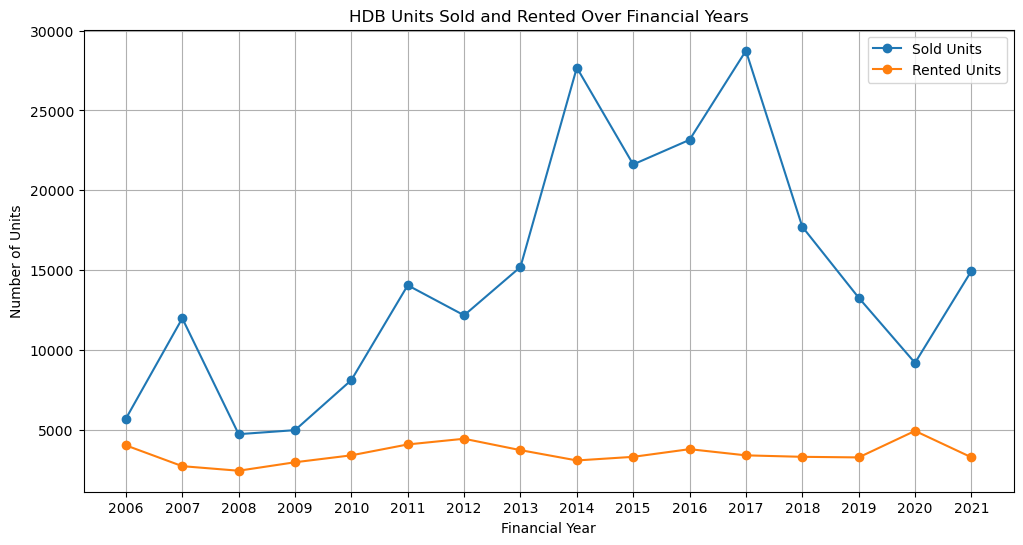

In [16]:
# ============================================================
# SECTION 3: VISUALIZING HDB UNITS SOLD AND RENTED
# ============================================================

# TODO: Utilize the matplotlib library to plot a line chart showing both sold and rented units across years

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(unique_years,sold_list, "o-", label = "Sold Units")
plt.plot(unique_years,rented_list, "o-",label = "Rented Units")
plt.xlabel("Financial Year")
plt.ylabel("Number of Units")
plt.title("HDB Units Sold and Rented Over Financial Years")
plt.legend()
plt.grid()
plt.show()

## Section 4: Exploring the HDB Price Index

The resale price index tracks overall market trends.

### Task Instructions:
1. Extract the `quater` and `index` columns.
2. convert the `index` values to floats.
3. Group quaterly data by year (first 3 digits of `quater`) and compute the **average index per year**
4. Visualize the yearly average resale price index

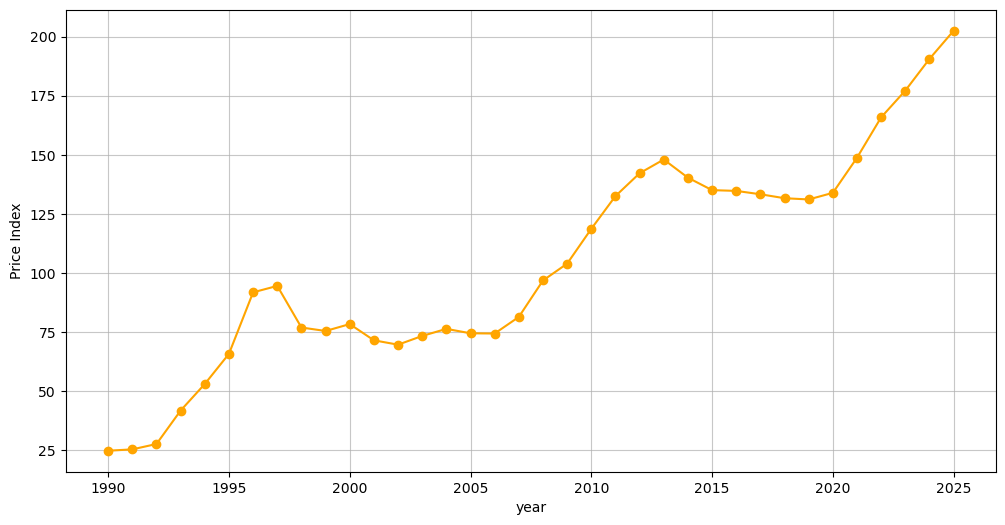

In [18]:
# ============================================================
# SECTION 4: EXPLORING THE HDB PRICE INDEX
# ============================================================

# TODO: Extract year from quater and index columns

quaters = price_index_data[:,0]
index_raw = price_index_data[:,1]
price_index = index_raw.astype(float)


years = np.array([q[:4] for q in quaters]).astype(int)
unique_years = np.unique(years)

avg_price_index = []
for y in unique_years:
    mask_year = (years == y)
    yearly_avg = price_index[mask_year].mean()
    avg_price_index.append(yearly_avg)

plt.figure(figsize=(12,6))
plt.plot(unique_years, avg_price_index, "o-", color="orange")
plt.xlabel("year")
plt.ylabel("Price Index")
plt.grid(True, linestyle="-", linewidth=0.8, alpha=0.7)
plt.show()



## Section 5: Comparing Unit Trends with Price Index

Now let's compare the **number of HDB units sold** with the **HDB price index** over the years

### Task Instructions:
1. Align both datasets by year (ignore years notoverlapping)
2. Plot a **dual-axis line chart**
    - Left y-axis: number of units sold
    - Right y-axis: resale price index
3. Observe whther sales volume rises or falls with prices

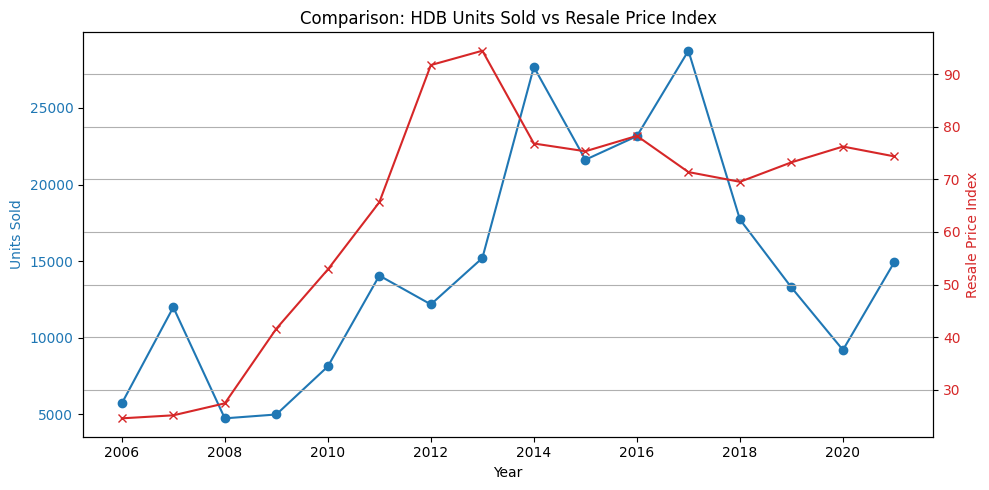

In [ ]:
# ============================================================
# SECTION 5: COMPARING UNIT TRENDS WITH PRICE INDEX
# ============================================================

# TODO: Plot a dual-axis line chart where the left y-axis represents the number of units sold, and the right
# y-axis represents the resale price index of HDB. You will need to align both of the datasets to achieve this

import numpy as np
import matplotlib.pyplot as plt

years = unit_data[:, 0].astype(int)
unique_years = np.unique(years)

sold_per_year = {int(y): int(units_col[(years == y)& (category_col == "Sold")].sum()) for y in unique_years}
rented_per_year = {int(y) : int(units_col[(years == y) & (category_col == "Rented")].sum()) for y in unique_years}

quaters = price_index_data[:,0]
rpi_raw = price_index_data[:1].astype(float)
rpi_years = np.array([q[:4] for q in quaters]).astype(int)
rpi_unique_years = np.unique(rpi_years)

yearly_rpi = {int(y):float(np.mean(rpi_raw[(rpi_years==y)])) for y in rpi_unique_years}


## Section 6: Reflection

In your reflection report, answer the following:

1. Discuss **two key insights** you observed about HDB housing trends.
2. What relationship, if any, did you find between the **number of units sold** and the **price index**?
3. What challenges did you face using Numpy and Matplotlib?

Save your responses in the **Reflection Report** and submit it along with this notebook